In [5]:
!python -m pip install --upgrade pip



Requirement already up-to-date: pip in c:\users\neelh\onedrive - stevens.edu\stevens after arrival\side projects\corona virus india\env\lib\site-packages (20.1.1)


In [6]:
!pip3 install beautifulsoup4

In [7]:
!pip3 install requests

In [8]:
!pip3 install tabulate

In [9]:
!pip3 install numpy


  Using cached numpy-1.18.4-cp37-cp37m-win_amd64.whl (12.8 MB)


In [10]:
!pip3 install matplotlib 

  Using cached matplotlib-3.2.1-cp37-cp37m-win_amd64.whl (9.2 MB)
  Using cached kiwisolver-1.2.0-cp37-none-win_amd64.whl (57 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


In [16]:
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate
import os
import numpy as np
import matplotlib.pyplot as plt

In [18]:
extract_contents = lambda row: [x.text.replace('\n','') for x in row]
URL = 'https://www.mohfw.gov.in/'

SHORT_HEADERS = ['SNo', 'State', 'Confirmed','Cured','Dead']
response  = requests.get(URL).content
soup = BeautifulSoup(response, 'html.parser')
header = extract_contents(soup.tr.find_all('th'))
stats = []
all_rows = soup.find_all('tr')

for row in  all_rows:
    stat = extract_contents(row.find_all('td'))
    
    if stat:
        if len(stat) == 4:
            stat = ['',*stat]
            stat.append(stat)
        elif len(stat) == 5:
            stats.append(stat)
stats[-1][0] = len(stats)
stats[-1][1] = "Total Cases"

objects = []
for row in stats:
    objects.append(row[1])

y_pos = np.arange(len(objects))
performance = []
for row in stats[:len(stats)-1]:
    performance.append(int(row[2]))
performance.append(int(stats[-1][2][:len(stats[-1][2])-1]))
table = tabulate(stats, headers = SHORT_HEADERS)
print(table)

SNo    State                               Confirmed  Cured    Dead
-----  --------------------------------  -----------  -------  ------
1      Andaman and Nicobar Islands                33  33       0
2      Andhra Pradesh                           3171  2057     58
3      Arunachal Pradesh                           2  1        0
4      Assam                                     781  87       4
5      Bihar                                    3061  1083     15
6      Chandigarh                                279  187      4
7      Chhattisgarh                              369  83       0
8      Dadar Nagar Haveli                          2  0        0
9      Delhi                                   15257  7264     303
10     Goa                                        68  37       0
11     Gujarat                                 15195  7549     938
12     Haryana                                  1381  838      18
13     Himachal Pradesh                          273  70       5
14     Jam

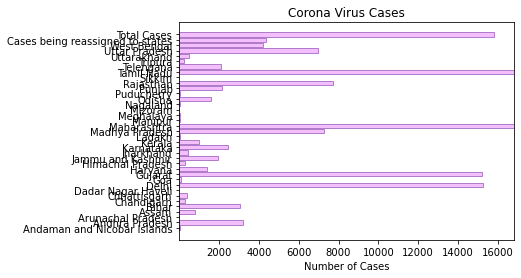

In [25]:
plt.barh(y_pos,performance,align = 'center', alpha = 0.5, color = (234/256.0, 128/256.0, 252/256.0),edgecolor=(106/256.0, 27/256.0, 154/256.0))
plt.yticks(y_pos, objects)
plt.xlim(1, performance[-1]+1000)
plt.xlabel('Number of Cases')
plt.title('Corona Virus Cases')
plt.show()